# Initialization 

In [89]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import bs4
import requests
%matplotlib inline

file_opioids = 'opioids.csv'
file_overdoses = 'overdoses.csv'
file_prescribers = 'prescriber-info.csv'

In [70]:
opioids = pd.read_csv(file_opioids)
overdoses = pd.read_csv(file_overdoses)
prescribers = pd.read_csv(file_prescribers)

In [71]:
overdoses = overdoses.set_index('State')

In [72]:
overdoses['Population']=overdoses['Population'].str.replace(',', '')
overdoses['Deaths']=overdoses['Deaths'].str.replace(',','')

In [73]:
overdoses[['Population', 'Deaths']]=overdoses[['Population','Deaths']].apply(pd.to_numeric)

In [74]:
max_deaths = overdoses['Deaths'].max()

In [75]:
# per capita measure might be better 
overdoses['Deaths Per Capita'] = overdoses['Deaths']/ overdoses['Population']
max_deaths_per_capita=overdoses['Deaths Per Capita'].max()
print(overdoses.loc[overdoses['Deaths Per Capita']==max_deaths_per_capita])
print(overdoses.loc[overdoses['Deaths']==max_deaths])

print(overdoses['Deaths'].describe())
print(overdoses['Deaths Per Capita'].describe())

               Population  Deaths Abbrev  Deaths Per Capita
State                                                      
West Virginia     1854304     627     WV           0.000338
            Population  Deaths Abbrev  Deaths Per Capita
State                                                   
California    38332521    4521     CA           0.000118
count      50.000000
mean      939.180000
std       898.195486
min        43.000000
25%       281.000000
50%       712.000000
75%      1209.750000
max      4521.000000
Name: Deaths, dtype: float64
count    50.000000
mean      0.000159
std       0.000055
min       0.000059
25%       0.000120
50%       0.000149
75%       0.000191
max       0.000338
Name: Deaths Per Capita, dtype: float64


In [76]:
# set index to prescriber identification number
prescribers=prescribers.set_index('NPI')

In [77]:
overdoses.tail()

,Population,Deaths,Abbrev,Deaths Per Capita
State,,,,
Virginia,8260405,980,VA,0.000119
Washington,6971406,979,WA,0.000140
West Virginia,1854304,627,WV,0.000338
Wisconsin,5742713,853,WI,0.000149
Wyoming,582658,109,WY,0.000187


In [78]:
prescribers.tail()

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
NPI,,,,,,,,,,,,,,,,,,,,,
1619019353,F,WA,M.D.,Family Practice,0,12,0,0,0,46,...,0,0,0,0,39,0,0,0,0,1
1780693671,F,MI,DO,Internal Medicine,0,15,0,0,0,0,...,0,0,0,0,20,0,0,0,0,1
1346270956,M,AZ,MD,Emergency Medicine,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1023116514,F,IN,M.D.,Family Practice,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1518913672,M,NY,M.D.,Dermatology,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# rename column because it's confusing
prescribers= prescribers.rename({'State':'Abbrev'}, axis=1);

In [80]:
# add prescriber information to overdose df 
prescribers_per_state = []
for index, row in overdoses.iterrows(): 
    prescribers_per_state.append(prescribers.loc[prescribers['Abbrev']==row['Abbrev']].shape[0])
overdoses['Prescribers'] = prescribers_per_state

In [81]:
# prescribers per capita
overdoses['Prescribers Per Capita'] = overdoses['Prescribers']/overdoses['Population']

In [82]:
overdoses.tail()

,Population,Deaths,Abbrev,Deaths Per Capita,Prescribers,Prescribers Per Capita
State,,,,,,
Virginia,8260405,980,VA,0.000119,568,0.000069
Washington,6971406,979,WA,0.000140,578,0.000083
West Virginia,1854304,627,WV,0.000338,199,0.000107
Wisconsin,5742713,853,WI,0.000149,498,0.000087
Wyoming,582658,109,WY,0.000187,38,0.000065


In [83]:
print(overdoses.loc[overdoses['Deaths Per Capita']==max_deaths_per_capita])
print(overdoses.loc[overdoses['Deaths']==max_deaths])

               Population  Deaths Abbrev  Deaths Per Capita  Prescribers  \
State                                                                      
West Virginia     1854304     627     WV           0.000338          199   

               Prescribers Per Capita  
State                                  
West Virginia                0.000107  
            Population  Deaths Abbrev  Deaths Per Capita  Prescribers  \
State                                                                   
California    38332521    4521     CA           0.000118         2562   

            Prescribers Per Capita  
State                               
California                0.000067  


In [169]:
# Census Bureau-designated regions and divisions 
# https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#Census_Bureau-designated_regions_and_divisions

#divisions
new_england = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT']
mid_atlantic = ['NJ', 'NY', 'PA']
east_north_central = ['IL', 'IN', 'MI', 'OH', 'WI']
west_north_central = ['IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']
south_atlantic = ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV']
east_south_central = ['AL', 'KY', 'MS', 'TN']
west_south_central = ['AR', 'LA', 'OK', 'TX']
mountain = ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY']
pacific = ['AK', 'CA', 'HI', 'OR', 'WA']
pacific_noHI = ['AK', 'CA', 'OR', 'WA']
#regions 
northeast = new_england + mid_atlantic
midwest = east_north_central + west_north_central 
south = south_atlantic + east_south_central + west_south_central
west = mountain + pacific

In [170]:
def categorize_region(abbrev):
    if abbrev in northeast:
        return "northeast"
    elif abbrev in midwest:
        return "midwest"
    elif abbrev in south:
        return "south"
    elif abbrev in west:
        return "west"
    else:
        return "no_region"

In [171]:
overdoses['Region']= overdoses['Abbrev'].apply(categorize_region)

In [173]:
# check that every state has a category
overdoses.loc[overdoses['Region']== 'no_region']

,Population,Deaths,Abbrev,Deaths Per Capita,Prescribers,Prescribers Per Capita,Region
State,,,,,,,


# Visualizations 

## *Overdose Deaths Per Capita*

Text(0.5,1,'Opioid Overdose Deaths per capita in all 50 States')

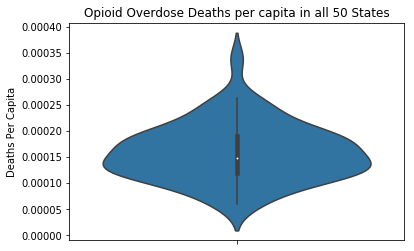

In [131]:
# visualize deaths per capita
dpc_violin = sns.violinplot(y='Deaths Per Capita', data=overdoses)
dpc_violin.set_title('Opioid Overdose Deaths per capita in all 50 States')

In [132]:
overdoses_dpc = overdoses.sort_values('Deaths Per Capita')

Text(0.5,1,'Opioid Overdose Deaths Per Capita by State')

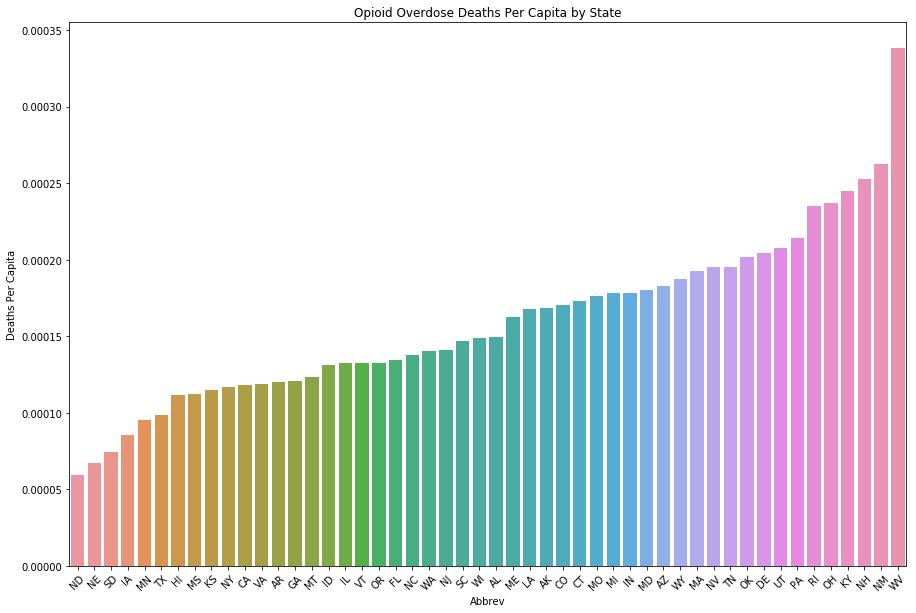

In [142]:
plt.subplots(figsize=(15,10))
dpc_bar = sns.barplot(x = 'Abbrev', y='Deaths Per Capita', data = overdoses_dpc)
dpc_bar.set_xticklabels(overdoses_dpc.Abbrev, rotation = 45)
dpc_bar.set_title('Opioid Overdose Deaths Per Capita by State')

## *Providers Per Capita*

Text(0.5,1,'Prescribers Per Capita in all 50 States')

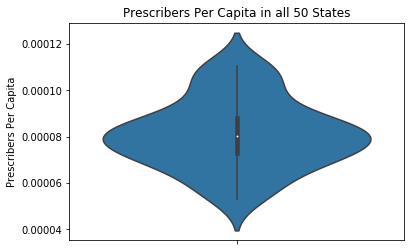

In [134]:
# Visualize prescribers per capita
prescriber_violin = sns.violinplot(y='Prescribers Per Capita', data=overdoses)
prescriber_violin.set_title('Prescribers Per Capita in all 50 States')

Text(0.5,1,'Prescribers Per Capita by State')

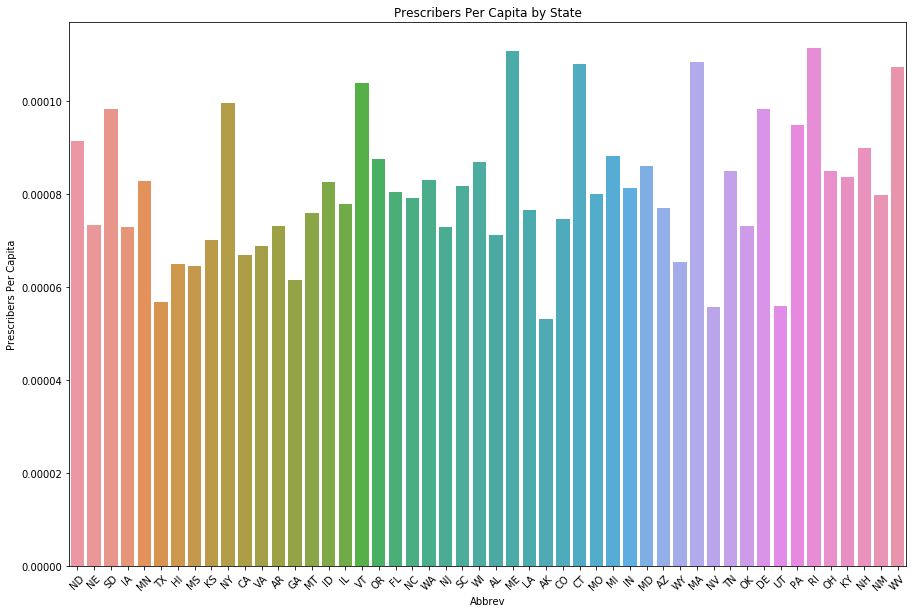

In [139]:
plt.subplots(figsize=(15,10))
dpc_bar = sns.barplot(x = 'Abbrev', y='Prescribers Per Capita', data = overdoses_dpc)
dpc_bar.set_xticklabels(overdoses_dpc.Abbrev, rotation = 45)
dpc_bar.set_title('Prescribers Per Capita by State')

Text(0.5,1,'Deaths Per Capita versus Prescribers Per Capita')

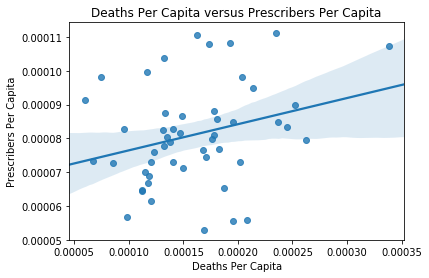

In [137]:
# Opioid overdoses per capita not directly correlated to prescribers per capita
dpc_ppc_line = sns.regplot(x='Deaths Per Capita', y = 'Prescribers Per Capita', data = overdoses)
dpc_ppc_line.set_title('Deaths Per Capita versus Prescribers Per Capita')

# Are there Regional Differences?

Text(0.5,1,'Opioid Overdose Deaths per capita by region')

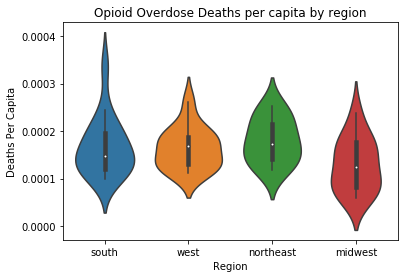

In [174]:
# repeat violin plot for deaths per capita, separate by region 
dpc_region_violin = sns.violinplot(x='Region', y='Deaths Per Capita', data=overdoses)
dpc_region_violin.set_title('Opioid Overdose Deaths per capita by region')

Text(0.5,1,'Prescribers Per Capita by Region')

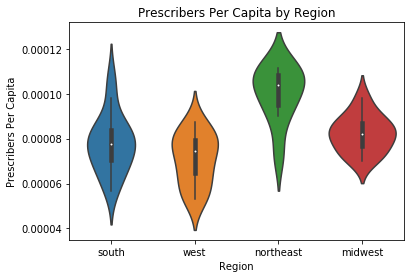

In [175]:
# prescribers per capita by region
prescriber_region_violin = sns.violinplot(x='Region', y='Prescribers Per Capita', data=overdoses)
prescriber_region_violin.set_title('Prescribers Per Capita by Region')